## *Movie Average Rating Analysis*
####  Movie Ratings would help reduce the search time to select the right movie to watch with millions of movies available online.
### Approach
##### -  Import the required libraries and read in the train and test data
##### -  Get the information and description of the data - it glimpse a view of the data types and the presence of the missing values
##### -  Determine the numerical and the categorical columns to transform them as required 
##### -  Visualize their relation with the dependent variable along with their relationship with the others
##### -  Final Train and Test Data Sets 
##### -  Choosing the right algorithm
##### -  Predicting the outcome variable

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [2]:
#Read the movie test and train dataset
movieTest = pd.read_csv('397348_movies_test.csv')
movieData = pd.read_csv('397348_movies_train.csv')

In [3]:
#A glimpse of the data
movieData.head()

,movie_id,movie_budget,movie_genres,homepage_exist,original_language,movie_overview,popularity_score,production_countries,release_date,gross_revenue,...,spoken_languages,punchline,title_no_of_letters,title_no_of_words,vote_count,production_companies,cast,crew,movie_keywords,average_rating
0,1,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Yes,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,6,1,11800,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",3.60
1,2,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Yes,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",40,7,4500,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",3.45
2,3,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Yes,en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,7,1,4466,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",3.15
3,4,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Yes,en,Following the death of District Attorney Harve...,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,21,4,9106,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",3.80
4,5,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Yes,en,"John Carter is a war-weary, former military ca...",43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",11,2,2124,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",3.05


In [4]:
#Categorical Data Overview
movieData[['movie_genres','homepage_exist','original_language','movie_overview','production_countries','release_date','spoken_languages','punchline','production_companies','cast','crew','movie_keywords']].describe()

,movie_genres,homepage_exist,original_language,movie_overview,production_countries,release_date,spoken_languages,punchline,production_companies,cast,crew,movie_keywords
count,4000,1446,4000,3998,4000,4000,4000,3426,4000,4000,3996,3993
unique,1072,1,32,3998,407,2914,486,3415,3256,3996,3995,3636
top,"[{""id"": 18, ""name"": ""Drama""}]",Yes,en,A group of friends whose leisurely Mexican hol...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",22-10-1999,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Be careful what you wish for.,[],[],[],[]
freq,287,1446,3759,1,2554,7,2656,2,86,5,2,248


In [5]:
movieData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 21 columns):
movie_id                4000 non-null int64
movie_budget            4000 non-null int64
movie_genres            4000 non-null object
homepage_exist          1446 non-null object
original_language       4000 non-null object
movie_overview          3998 non-null object
popularity_score        4000 non-null float64
production_countries    4000 non-null object
release_date            4000 non-null object
gross_revenue           4000 non-null int64
duration                3999 non-null float64
spoken_languages        4000 non-null object
punchline               3426 non-null object
title_no_of_letters     4000 non-null int64
title_no_of_words       4000 non-null int64
vote_count              4000 non-null int64
production_companies    4000 non-null object
cast                    4000 non-null object
crew                    3996 non-null object
movie_keywords          3993 non-null obje

In [6]:
#Finding the Null values for train and test data
movieData.isnull().sum()

movie_id                   0
movie_budget               0
movie_genres               0
homepage_exist          2554
original_language          0
movie_overview             2
popularity_score           0
production_countries       0
release_date               0
gross_revenue              0
duration                   1
spoken_languages           0
punchline                574
title_no_of_letters        0
title_no_of_words          0
vote_count                 0
production_companies       0
cast                       0
crew                       4
movie_keywords             7
average_rating             0
dtype: int64

###### - A glimpse of the data says that we have *20* independent variables out of which *12 are *categorical* variables and *8 numerical variables. 
###### - We find that all the numerical variables except *Duration* have no missing values.
###### - *Homepage_exist, puncline, crew* and *movie_keywords* have missing values too.
###### -  Since our outcome variable is continuous, we have to use a regressor alogorithm. Hence we have to transform the categorical variables accordingly.

##### Clearing out missing values in numerical variables

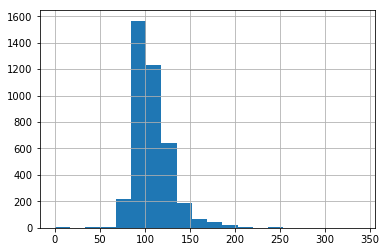

In [7]:
# Duration has one NaN value which is in row 3712
np.where(movieData["duration"].isnull())
movieData['duration'].hist(bins=20)

In [8]:
# Since the data is right skewed we take median to fill the missing value
movieData.loc[3712,'duration'] = movieData['duration'].median()

##### Transforming and choosing the categorical variables

##### Genre Variable
- Genre plays a vital role while the movies are being watched, we extract the unique values of the genres available . 
- Tranform the genre column by extracting the genre values and make a list of it 
- A data frame is created with the unique genres as columns and cells are set 1 or 0 according to the genre list of the movies

In [9]:
#Getting the Unique Genre List
def getUniqueGenreList(genreData):
    
    import json
    genreList = []

    for row in genreData:
        temp = json.loads(row)
        for genre in temp:
            if genre['name'] not in genreList:
                genreList.append(genre['name']) 
    return genreList

In [10]:
#Converting the movie_genres column whhich has a list of dictionaries to a list of distinct genre list

def getUniqueGenreColumn(genreData):    
    import json
    final = []

    for i in genreData:
        v = json.loads(i)
        y=[]
        for e in v:
            y.append(e['name'])
        final.append(y)  
    return final

In [11]:
#Make a dataframe with unique genre values as columns and genredata marked as 1 or 0

genreList = getUniqueGenreList(movieData['movie_genres'])
genreColumn = getUniqueGenreColumn(movieData["movie_genres"])

print("Unique Genre List")
print(genreList)
print('\n')
print("Transformation of Genre column to just have the list of genres of the movies")
print(genreColumn[0])
print(genreColumn[1])
print(genreColumn[2])

Unique Genre List
['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign', 'TV Movie']


Transformation of Genre column to just have the list of genres of the movies
['Action', 'Adventure', 'Fantasy', 'Science Fiction']
['Adventure', 'Fantasy', 'Action']
['Action', 'Adventure', 'Crime']


In [12]:
#Creation of the genre train dataframe
movieTrainDataFrame = pd.DataFrame(columns = genreList, index=range(4000))
k=0
for i in genreColumn:
    for j in i:
        movieTrainDataFrame.loc[k,j] = 1 
    k+=1

movieTrainDataFrame = movieTrainDataFrame.fillna(value=0)
print("The Movie Train DataFrame with the genre data as columns")
movieTrainDataFrame.head()

The Movie Train DataFrame with the genre data as columns


,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Release Date Variable
-  We transform the release date to the pandas timestamp.
-  Extract year and month and create the new columns in the Movie Train DataFrame

In [13]:
#Converting release date of train data to timestamp and extract year and month
import datetime as dt
movieData['release_date'] = pd.to_datetime(movieData['release_date'])

movieTrainDataFrame['movieRealeaseYear'] = movieData['release_date'].dt.year
movieTrainDataFrame['movieRealeaseMonth'] =  movieData['release_date'].dt.month
movieTrainDataFrame.head()

,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,...,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,movieRealeaseYear,movieRealeaseMonth
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2009,10
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2007,5
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2015,10
3,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,2012,7
4,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2012,7


##### Production Countries Variable
-  We transform the production_countries column by extracting the countries as a list.

In [14]:
movieTrainDataFrame['production_countries'] = getUniqueGenreColumn(movieData['production_countries'])
movieTrainDataFrame['production_countries'] = movieTrainDataFrame['production_countries'].apply(lambda x: ",".join(x))

##### Original Language Variable
-  We move the original_language column as such.

In [15]:
movieTrainDataFrame[['original_language']] = movieData[['original_language']]

##### Spoken Languages  Variable
-  We transform the spoken_languages variable by extracting the languages as a list.

In [16]:
movieTrainDataFrame['spoken_languages'] = getUniqueGenreColumn(movieData['spoken_languages'])
movieTrainDataFrame['spoken_languages'] = movieTrainDataFrame['spoken_languages'].apply(lambda x: ",".join(x))

##### HomePage Exist Variable
-  We move the homepage_exist column and fill the missing values as No

In [17]:
movieTrainDataFrame['homepage_exist'] = movieData['homepage_exist']
movieTrainDataFrame['homepage_exist']=movieTrainDataFrame['homepage_exist'].fillna(value='No')

##### Movie Keywords  Variable
-  We first fill the movie_keywords column missing values with the most frequent value '[]'.
-  Then extract the keywords as the list

In [18]:
movieData['movie_keywords'] = movieData['movie_keywords'].fillna(value='[]')
movieTrainDataFrame['movie_keywords'] = getUniqueGenreColumn(movieData['movie_keywords'])
movieTrainDataFrame['movie_keywords'] = movieTrainDataFrame['movie_keywords'].apply(lambda x: ",".join(x))

##### We would be dropping these columns - movie_overview, punchline, cast, crew and production companies.
##### These columns have more than 2000 unique variables which would not help much when we transform them to numerical values.(Note : Cast and Crew data threw some data delimiter error while I was transforming as the above but the data size was too big to configure where the missing delimiter is.)
##### We perform original encoding from the pandas dataframe on the categorical data and convert them as unique numerical values

In [19]:
for variable in movieTrainDataFrame.columns: # Loop through all columns in the dataframe
    if movieTrainDataFrame[variable].dtype == 'object': # Only apply for columns with categorical strings
        movieTrainDataFrame[variable] = pd.Categorical(movieTrainDataFrame[variable]).codes # Replace strings with an integer

##### The final movieTrainDataFrame is then formed by merging in the other numerical columns and having a view of the final training set

In [20]:
#Creating the final Train Dataset with all the numerical values included and the categorical columns Genres and release date
movieTrainDataFrame[['movie_id','movie_budget','popularity_score','gross_revenue','duration','title_no_of_letters','title_no_of_words','vote_count']] = movieData[['movie_id','movie_budget','popularity_score','gross_revenue','duration','title_no_of_letters','title_no_of_words','vote_count']]
#movieTrainDataFrame['average_rating'] = movieTrainDataFrame['average_rating'].astype(int)
movieTrainDataFrame.head()

,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,...,homepage_exist,movie_keywords,movie_id,movie_budget,popularity_score,gross_revenue,duration,title_no_of_letters,title_no_of_words,vote_count
0,1,1,1,1,0,0,0,0,0,0,...,1,870,1,237000000,150.437577,2787965087,162.0,6,1,11800
1,1,1,1,0,0,0,0,0,0,0,...,1,2348,2,300000000,139.082615,961000000,169.0,40,7,4500
2,1,1,0,0,1,0,0,0,0,0,...,1,3117,3,245000000,107.376788,880674609,148.0,7,1,4466
3,1,0,0,0,1,1,1,0,0,0,...,1,912,4,250000000,112.312950,1084939099,165.0,21,4,9106
4,1,1,0,1,0,0,0,0,0,0,...,1,315,5,260000000,43.926995,284139100,132.0,11,2,2124


##### Correlation between the variables

In [21]:
#find the correlation between the columns to see the correlation between the variables to achieve better results
movieTrainDataFrame.corr()

,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,...,homepage_exist,movie_keywords,movie_id,movie_budget,popularity_score,gross_revenue,duration,title_no_of_letters,title_no_of_words,vote_count
Action,1.000000,0.361972,0.071732,0.234419,0.138485,-0.224717,0.255225,-0.068397,-0.105586,0.049968,...,0.044324,0.016815,-0.209210,0.313186,0.161652,0.204741,0.077520,-0.002363,-0.013172,0.205963
Adventure,0.361972,1.000000,0.232673,0.218674,-0.111182,-0.234315,-0.019429,0.194398,0.225329,0.032171,...,0.087579,0.002505,-0.226935,0.404876,0.244284,0.345040,0.075454,0.132829,0.117554,0.269420
Fantasy,0.071732,0.232673,1.000000,0.087643,-0.112807,-0.162599,-0.089642,0.144489,0.249388,-0.028691,...,0.058978,-0.000254,-0.152821,0.259653,0.136797,0.208928,-0.022319,0.105774,0.079215,0.156202
Science Fiction,0.234419,0.218674,0.087643,1.000000,-0.122175,-0.216302,0.094838,0.012642,0.005097,-0.041513,...,0.052497,-0.000191,-0.096927,0.207536,0.166479,0.163046,-0.005457,0.017392,-0.013691,0.224012
Crime,0.138485,-0.111182,-0.112807,-0.122175,1.000000,0.045875,0.302791,-0.099349,-0.134190,-0.012016,...,-0.031142,0.003350,-0.033980,-0.029164,-0.000577,-0.058005,0.045006,-0.074194,-0.067080,-0.000370
Drama,-0.224717,-0.234315,-0.162599,-0.216302,0.045875,1.000000,-0.064899,-0.184668,-0.171715,-0.015051,...,-0.062074,-0.010697,0.110871,-0.205604,-0.115936,-0.182178,0.287742,-0.095839,-0.083648,-0.128851
Thriller,0.255225,-0.019429,-0.089642,0.094838,0.302791,-0.064899,1.000000,-0.137048,-0.207201,-0.050081,...,-0.010588,-0.000046,-0.051227,0.024824,0.042144,-0.021134,-0.003074,-0.110666,-0.105331,0.026298
Animation,-0.068397,0.194398,0.144489,0.012642,-0.099349,-0.184668,-0.137048,1.000000,0.548832,-0.021794,...,0.112047,-0.019303,-0.134733,0.214206,0.118957,0.201684,-0.203744,0.048880,0.037837,0.095163
Family,-0.105586,0.225329,0.249388,0.005097,-0.134190,-0.171715,-0.207201,0.548832,1.000000,-0.033646,...,0.072719,-0.052395,-0.136343,0.176175,0.061716,0.165906,-0.180910,0.083251,0.079896,0.048892
Western,0.049968,0.032171,-0.028691,-0.041513,-0.012016,-0.015051,-0.050081,-0.021794,-0.033646,1.000000,...,-0.029277,-0.003189,0.025452,-0.003336,-0.011624,-0.029563,0.071635,0.015446,0.018796,-0.005070


##### Correlation between the independent variables does not seem to be high which means the features are almost equally important 

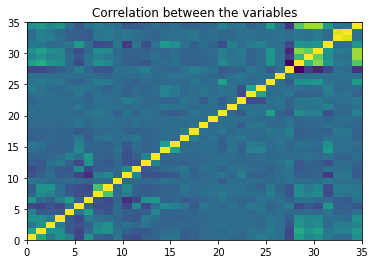

In [22]:
plt.pcolor(movieTrainDataFrame.corr())
plt.title("Correlation between the variables")
plt.show()

<h4> Exploratory Data Analysis </h4> 

In [23]:
visualFrame = pd.DataFrame()
visualFrame[movieTrainDataFrame.columns] = movieTrainDataFrame[movieTrainDataFrame.columns]
visualFrame[['average_rating']] = movieData[['average_rating']]
visualFrame['average_rating'] = visualFrame['average_rating'].astype(int)
visualFrame['duration'] = visualFrame['duration'].apply(lambda x: 1 if x <= 109 else 0)

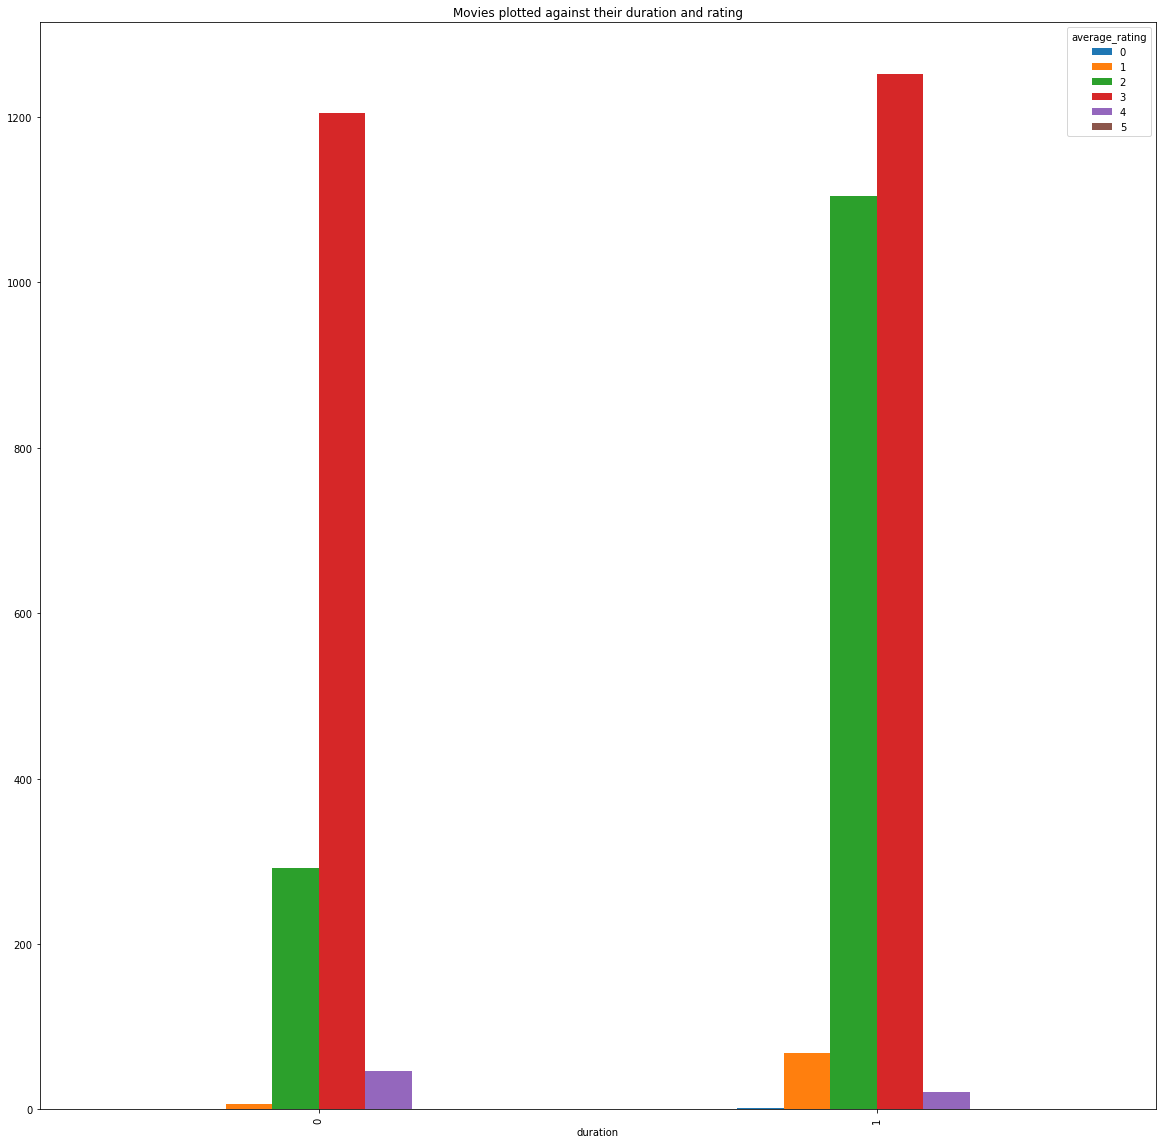

In [24]:
#We see during which years the movies were rated the maximum
duration_group = visualFrame.groupby(['duration','average_rating'])
duration_group.size().unstack().plot(kind='bar',title="Movies plotted against their duration and rating",figsize=(20,20))

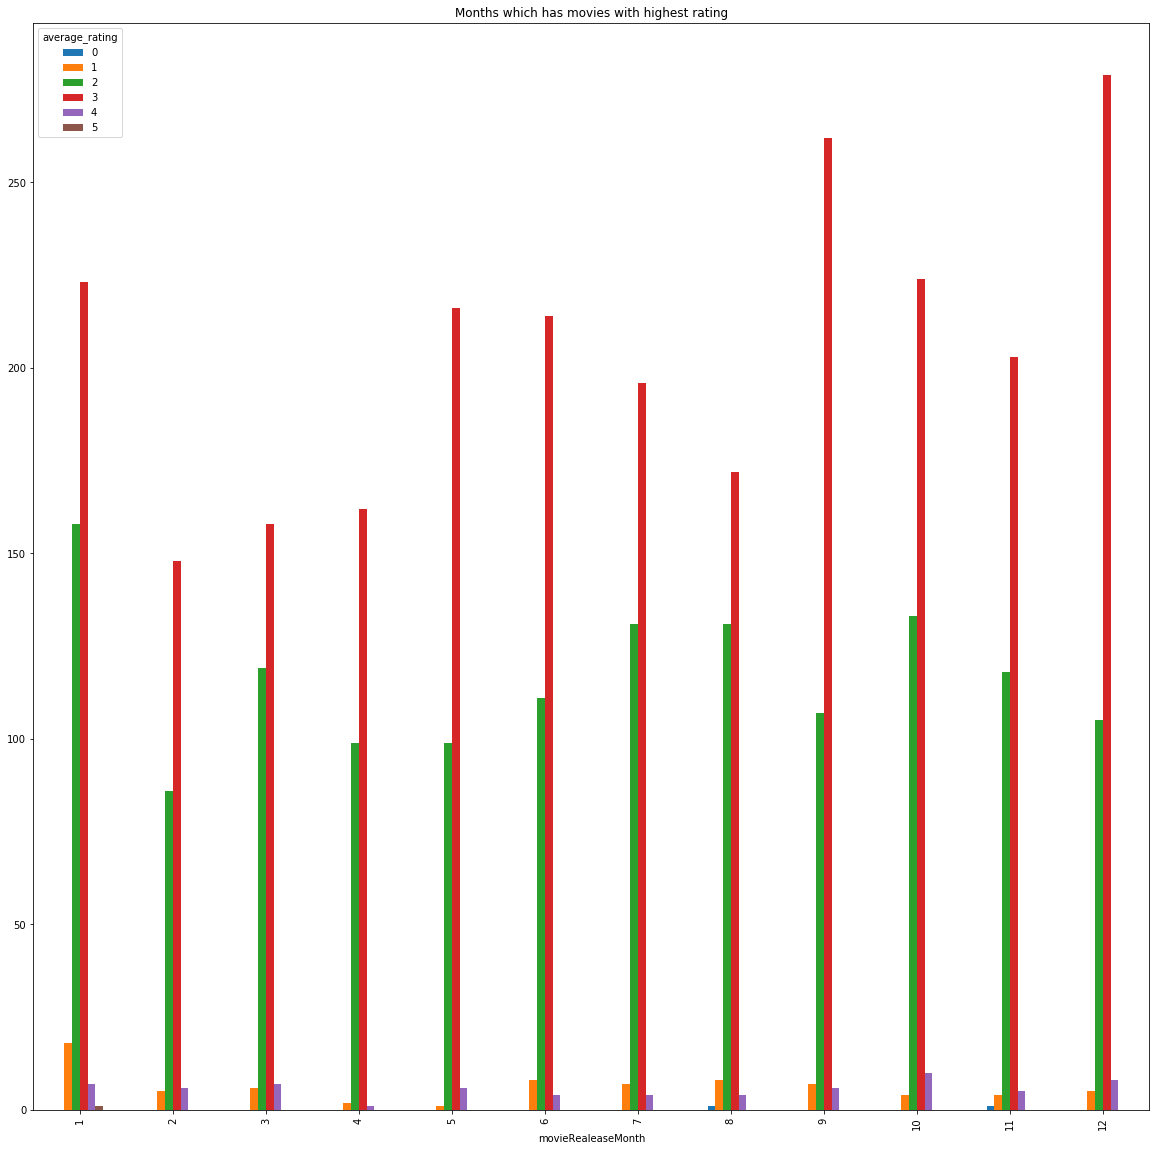

In [25]:
#We see during which months the movies were rated the maximum
month_group = visualFrame.groupby(['movieRealeaseMonth','average_rating'])
month_group.size().unstack().plot(kind='bar',title="Months which has movies with highest rating",figsize=(20,20))

##### Perform the same analysis on the Movie Test data

In [26]:
#Observe the distributaion of the numerical data
movieTest.describe()

,movie_id,movie_budget,popularity_score,gross_revenue,duration,title_no_of_letters,title_no_of_words,vote_count
count,500.000000,5.000000e+02,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,4250.500000,3.167505e+07,21.809455,8.731057e+07,109.876000,15.376000,2.792000,721.384000
std,144.481833,3.988676e+07,22.481378,1.461142e+08,20.198232,7.919853,1.523607,1188.837214
min,4001.000000,0.000000e+00,0.011697,0.000000e+00,41.000000,2.000000,1.000000,1.000000
25%,4125.750000,3.714094e+06,6.694795,6.377548e+05,97.000000,10.000000,2.000000,79.500000
50%,4250.500000,1.800000e+07,14.713210,2.812701e+07,107.000000,14.000000,2.000000,278.500000
75%,4375.250000,4.500000e+07,29.875923,1.193715e+08,119.000000,19.000000,3.000000,837.250000
max,4500.000000,2.500000e+08,187.322927,1.108561e+09,254.000000,50.000000,9.000000,12002.000000


In [27]:
movieTest.isnull().sum()

movie_id                  0
movie_budget              0
movie_genres              0
homepage_exist          300
original_language         0
movie_overview            0
popularity_score          0
production_countries      0
release_date              0
gross_revenue             0
duration                  0
spoken_languages          0
punchline                76
title_no_of_letters       0
title_no_of_words         0
vote_count                0
production_companies      0
cast                      0
crew                      0
movie_keywords            3
dtype: int64

In [28]:
genreTestColumn = getUniqueGenreColumn(movieTest["movie_genres"])
print(genreTestColumn[0:5])
##Creation of the genre test dataframe
movieTestDataFrame = pd.DataFrame(columns = genreList, index=range(500))
k=0
for i in genreTestColumn:
    for j in i:
        movieTestDataFrame.loc[k,j] = 1 
    k+=1

movieTestDataFrame = movieTestDataFrame.fillna(value=0)
movieTestDataFrame.head()

[['Adventure', 'Fantasy', 'Family'], ['Action', 'Adventure'], ['Action', 'Adventure', 'Thriller'], ['Fantasy', 'Adventure', 'Family'], ['Animation', 'Family', 'Adventure', 'Comedy']]


,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0


In [29]:
##Converting release date of test data to timestamp and extract year and month

movieTest['release_date'] = pd.to_datetime(movieTest['release_date'])

movieTestDataFrame['movieRealeaseYear'] = movieTest['release_date'].dt.year
movieTestDataFrame['movieRealeaseMonth'] =  movieTest['release_date'].dt.month
movieTestDataFrame.head()

,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,...,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,movieRealeaseYear,movieRealeaseMonth
0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2009,7
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2010,12
2,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2012,10
3,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2013,7
4,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,2011,11


In [30]:
movieTestDataFrame['spoken_languages'] = getUniqueGenreColumn(movieTest['spoken_languages'])
movieTestDataFrame['spoken_languages'] = movieTestDataFrame['spoken_languages'].apply(lambda x: ",".join(x))

In [31]:
movieTestDataFrame['original_language'] = movieTest['original_language']

In [32]:
movieTestDataFrame['production_countries'] = getUniqueGenreColumn(movieTest['production_countries'])
movieTestDataFrame['production_countries'] = movieTestDataFrame['production_countries'].apply(lambda x: ",".join(x))

In [33]:
movieTestDataFrame['homepage_exist'] = movieTest['homepage_exist']
movieTestDataFrame['homepage_exist']=movieTestDataFrame['homepage_exist'].fillna(value='No')

In [34]:
movieTest['movie_keywords'] = movieTest['movie_keywords'].fillna(value='[]')
movieTestDataFrame['movie_keywords'] = getUniqueGenreColumn(movieTest['movie_keywords'])
movieTestDataFrame['movie_keywords'] = movieTestDataFrame['movie_keywords'].apply(lambda x: ",".join(x))

In [35]:
for feature in movieTestDataFrame.columns: # Loop through all columns in the dataframe
    if movieTestDataFrame[feature].dtype == 'object': # Only apply for columns with categorical strings
        movieTestDataFrame[feature] = pd.Categorical(movieTestDataFrame[feature]).codes # Replace strings with an integer

In [36]:
#Creating the final Test Dataset with all the numerical values included and the categorical columns Genres and release date
movieTestDataFrame[['movie_id','movie_budget','popularity_score','gross_revenue','duration','title_no_of_letters','title_no_of_words','vote_count']] = movieTest[['movie_id','movie_budget','popularity_score','gross_revenue','duration','title_no_of_letters','title_no_of_words','vote_count']]
print(" The final movie Test data frame")
movieTestDataFrame.head()

 The final movie Test data frame


,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,...,homepage_exist,movie_keywords,movie_id,movie_budget,popularity_score,gross_revenue,duration,title_no_of_letters,title_no_of_words,vote_count
0,0,1,1,0,0,0,0,0,1,0,...,1,460,4001,250000000,98.885637,933959197,153,38,6,5293
1,1,1,0,0,0,0,0,0,0,0,...,1,365,4002,200000000,37.668301,310669540,140,10,2,1398
2,1,1,0,0,0,0,1,0,0,0,...,1,407,4003,200000000,93.004993,1108561013,143,7,1,7604
3,0,1,1,0,0,0,0,0,1,0,...,1,97,4004,200000000,46.985445,491868548,130,26,5,3530
4,0,1,0,0,0,0,0,1,1,0,...,1,89,4005,200000000,49.986590,559852396,106,6,2,2033


### Random Forest from Skicit Learn

In [38]:
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=0)
randomForest.fit(movieTrainDataFrame, movieData['average_rating'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=True, random_state=0,
           verbose=0, warm_start=False)

###### After fitting the model we predict the outcome variables and the score of the output

In [39]:
from sklearn.metrics import r2_score
predicted_train = randomForest.predict(movieTrainDataFrame)
predicted_test = randomForest.predict(movieTestDataFrame)
train_score = r2_score(movieData['average_rating'], predicted_train)
print(f'Out-of-bag R-2 score estimate: {randomForest.oob_score_:>5.3}')
print(f'Train data R-2 score: {train_score:>5.3}')

Out-of-bag R-2 score estimate: 0.505
Train data R-2 score: 0.933


##### Writing the ouput to a csv file

In [40]:
d = {'average_rating':predicted_test,'movie_id':movieTestDataFrame['movie_id']}

In [41]:
#Printing the output to a CSV file
finalOutput = pd.DataFrame(data=d)
finalOutput.set_index('movie_id', inplace=True)

In [42]:
finalOutput.to_csv('movieRatingOutcome.csv',sep=',')